In [22]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier

In [23]:
from xgboost import XGBClassifier

In [24]:
Data=pd.read_csv('C:\\Users\\saiku\\Desktop\\DATA Science\\machine learning projects\\classification projects\\employee churn\\data set\\employee attrition.csv')

In [25]:
Data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,NaN,NaN,NaN,NaN
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,NaN,NaN,NaN,1470.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,NaN,NaN,NaN,NaN
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,NaN,NaN,NaN,NaN
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,3,5,2,0,3,NaN,NaN,NaN,NaN
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,5,3,7,7,1,7,NaN,NaN,NaN,NaN
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,0,3,6,2,0,3,NaN,NaN,NaN,NaN
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,3,2,9,6,0,8,NaN,NaN,NaN,NaN


In [26]:
Data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,0,1,6,4,0,5,NaN,NaN,NaN,NaN
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,3,3,10,7,1,7,NaN,NaN,NaN,1470.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,3,3,0,0,0,0,NaN,NaN,NaN,NaN
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,3,8,7,3,0,NaN,NaN,NaN,NaN
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,3,3,2,2,2,2,NaN,NaN,NaN,NaN


In [27]:
Data.dtypes

Age                           int64
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

In [28]:
#checking for null values
Data.isna().sum()

Age                            0
Attrition                      0
BusinessTravel                 0
DailyRate                      0
Department                     0
DistanceFromHome               0
Education                      0
EducationField                 0
EmployeeCount                  0
EmployeeNumber                 0
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                  0
MonthlyIncome                  0
MonthlyRate                    0
NumCompaniesWorked             0
Over18                         0
OverTime                       0
PercentSalaryHike              0
PerformanceRating              0
RelationshipSatisfaction       0
StandardHours                  0
StockOptionLevel               0
TotalWorkingYears              0
TrainingTimesLastYear          0
WorkLifeBa

In [29]:
#checking for duplicate values
Data.duplicated().sum()

0

In [30]:
#Dropping the columns 
Data.drop(['Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 37','Unnamed: 38'],axis=1,inplace=True)

In [31]:
Data.shape

(1470, 35)

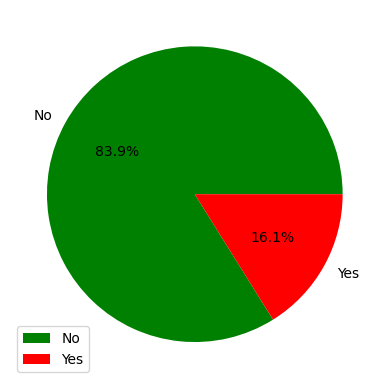

In [32]:
#checking the attrition rate using pie chart
y=Data['Attrition'].value_counts()
colors=['green','red']
labels=['No','Yes']
plt.pie(y,labels=labels,colors=colors,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()


#From this pie chart we can see that the percentage of Attrition rate is comparitively less. 16.1% is the attrition rate

C:\Users\saiku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

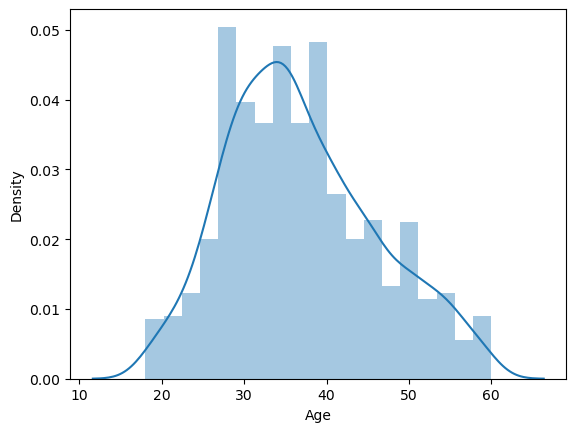

In [33]:
sns.distplot(Data['Age'])

#From this plot it is visible that most of the workforce lies between the Age group of 30 to 40

<AxesSubplot:xlabel='Department', ylabel='count'>

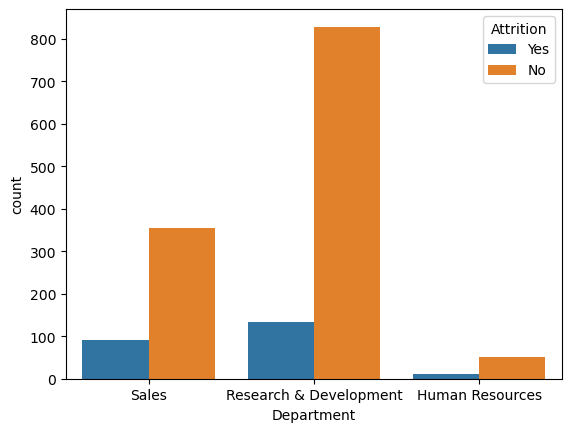

In [34]:
#Checking the Department in which attrition rate is huge
sns.countplot(x='Department',data=Data,hue='Attrition')

#The Attrition Rate is more in the Research and Development Department. whereas the Attrition Rate is very Less in the HR department

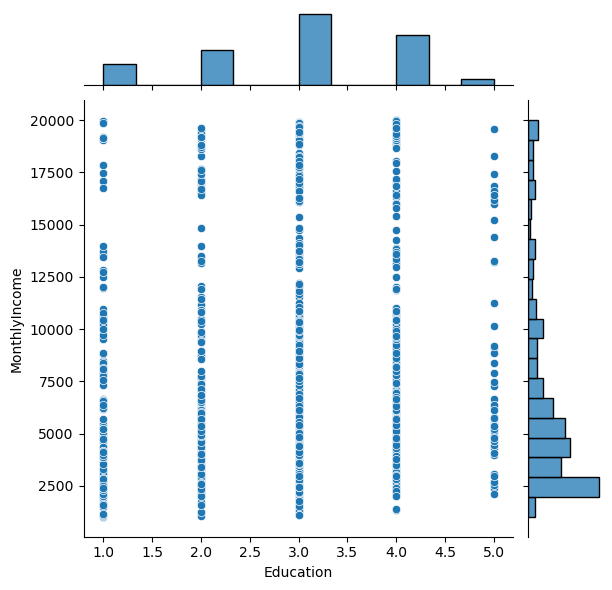

In [35]:
#checking the daily rate according to education
sns.jointplot(x='Education',y='MonthlyIncome',data=Data)

#From this plot we can see that more number of graduates becomes a huge part of the workforce.

<AxesSubplot:xlabel='Age', ylabel='count'>

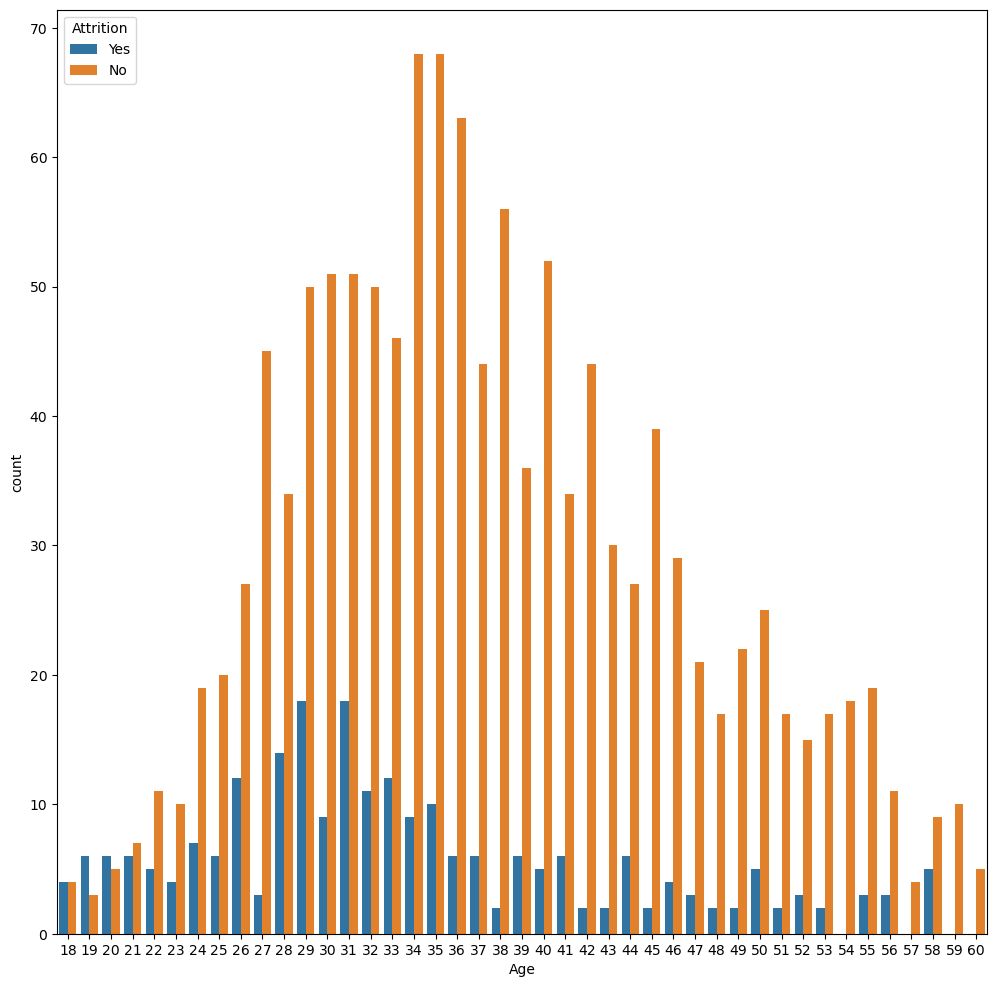

In [36]:
#checking which age group leaves the company 
fig, ax = plt.subplots(figsize=(12,12))
sns.countplot(x='Age',data=Data,hue='Attrition',ax=ax)

#Here we can see that the Attrition rate is more for people in the Age group 29 to 31.

<AxesSubplot:xlabel='Gender', ylabel='count'>

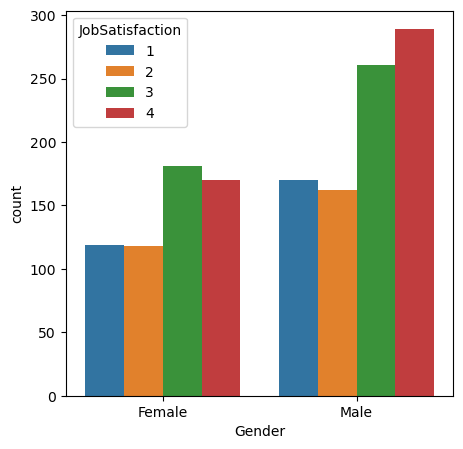

In [37]:
fig,ax=plt.subplots(figsize=(5, 5))
sns.countplot(x='Gender',data=Data,hue='JobSatisfaction',ax=ax)

<AxesSubplot:xlabel='Gender', ylabel='count'>

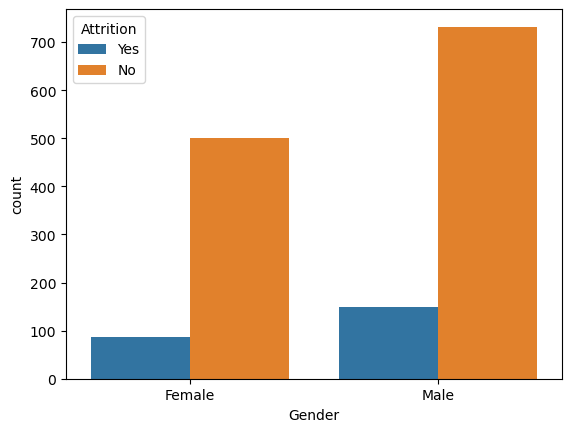

In [38]:
sns.countplot(x='Gender',data=Data,hue='Attrition')

#The Attrition rate among Males is More than Females.

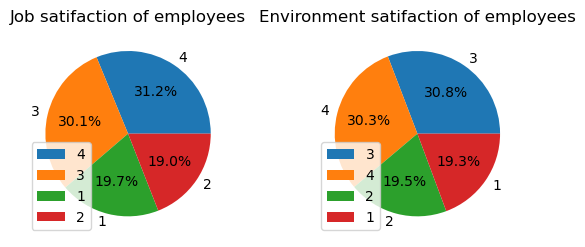

In [39]:
y=Data['JobSatisfaction'].value_counts()
labels=['4','3','1','2']
plt.subplot(1,2,1)
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Job satifaction of employees')

y=Data['EnvironmentSatisfaction'].value_counts()
labels=['3','4','2','1']
plt.subplot(1,2,2)
plt.pie(y,labels=labels,autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.title('Environment satifaction of employees')

plt.subplots_adjust(wspace=0.4)
plt.show()

#The rating of Job Satisfaction among the employees is 4 only 19.1% are dissatisfied with their job

#Thr rating of work environment satifaction is 3 only 19.3% are dissatisfied with the work Environment.

#We can understand that More number of employees are satisfied or partially satisfied with the work environment and job

In [40]:
Data.sort_values(by='YearsAtCompany',ascending=False).head(10)[['YearsAtCompany','PercentSalaryHike','PerformanceRating']]

,YearsAtCompany,PercentSalaryHike,PerformanceRating
126,40,12,3
98,37,13,3
1116,36,21,4
270,36,14,3
561,34,11,3
237,33,18,3
962,33,11,3
190,33,14,3
914,33,15,3
1111,33,16,3


<AxesSubplot:xlabel='YearsAtCompany', ylabel='PercentSalaryHike'>

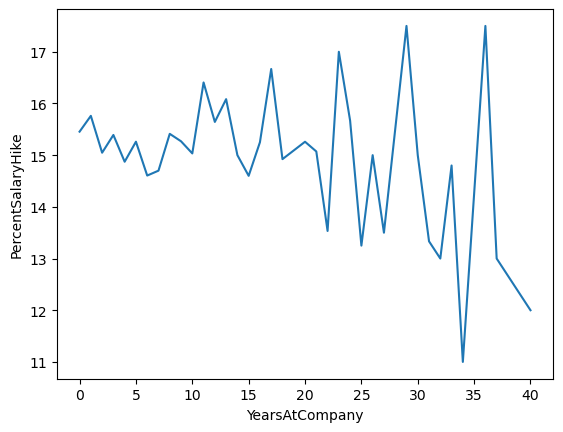

In [41]:
sns.lineplot(x='YearsAtCompany',y='PercentSalaryHike',data=Data,ci=None)

#From this plot we can see that the percentage of salary hike does not depend on number of years. So we also check the performance scale of employees with Highest salary hike

<AxesSubplot:xlabel='PerformanceRating', ylabel='PercentSalaryHike'>

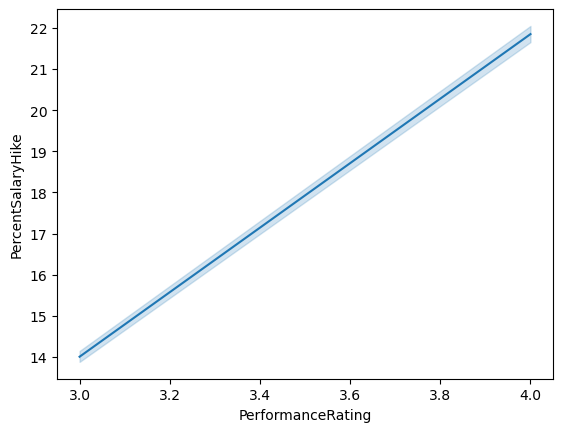

In [42]:
sns.lineplot(x='PerformanceRating',y='PercentSalaryHike',data=Data)

#Here we can see that the percentage of hike in salary only depends upon Performance of the Employee.

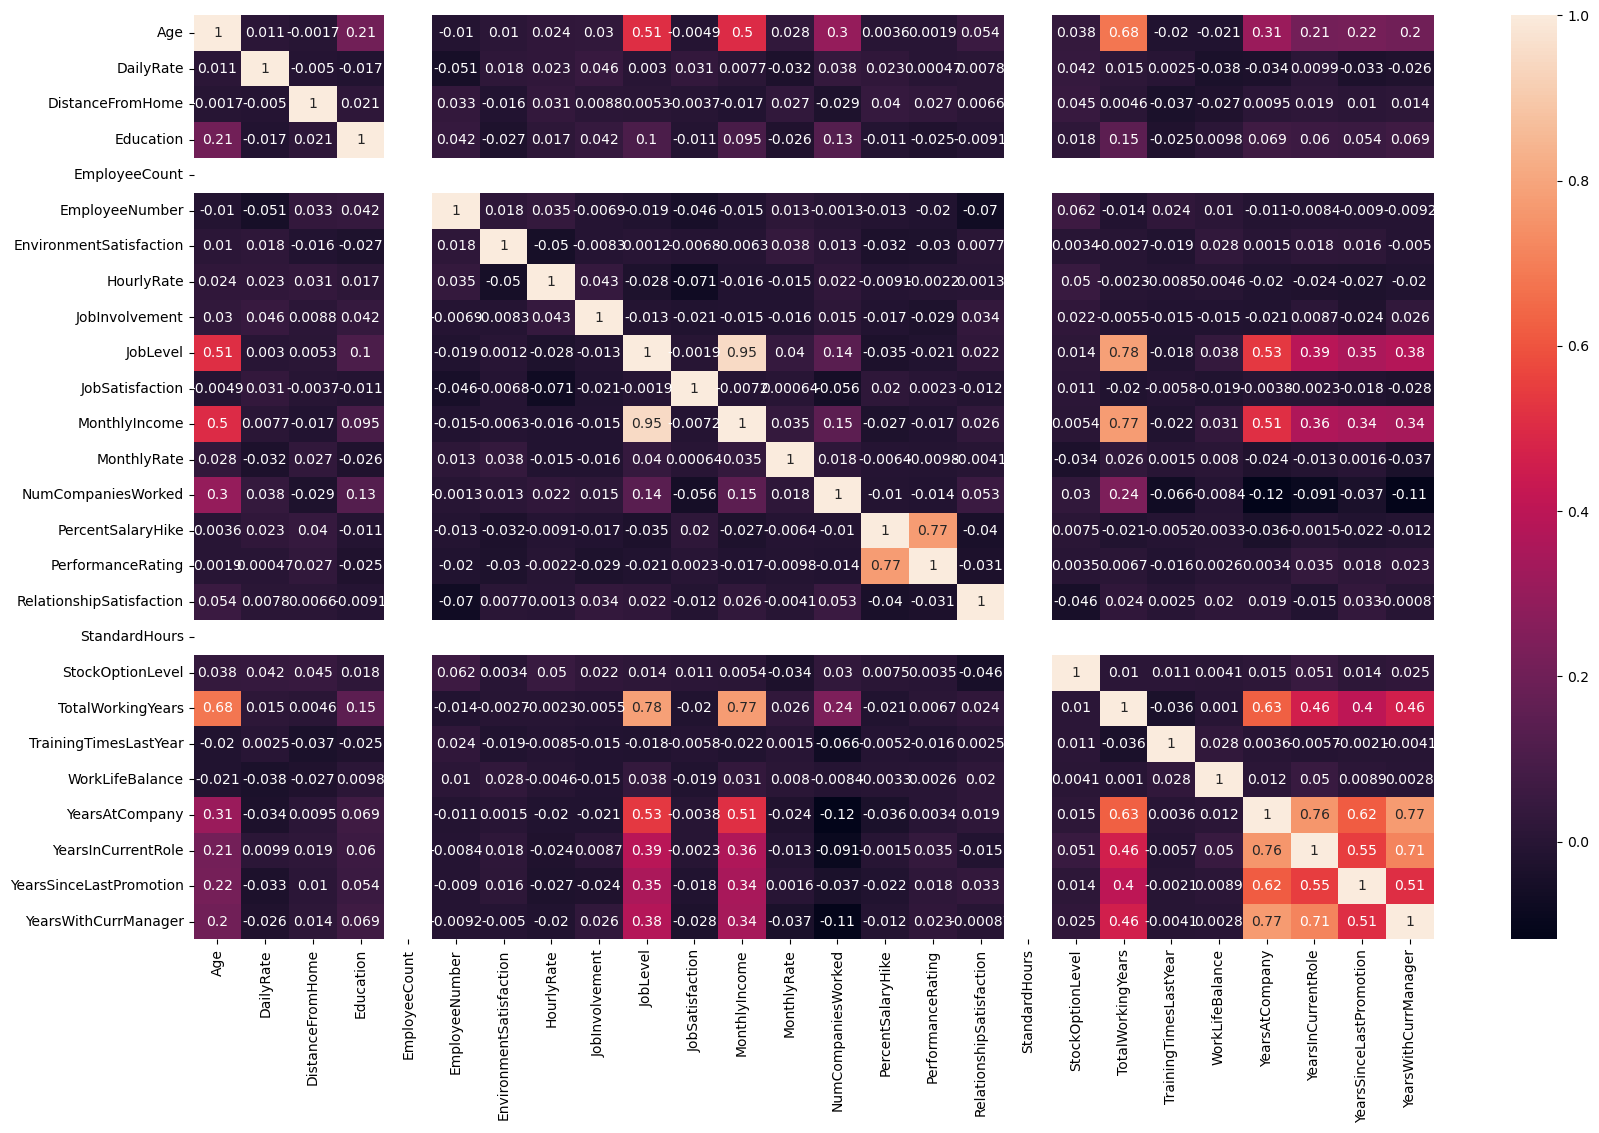

In [43]:
 fig,ax = plt.subplots(1,1, figsize = (20,12))
sns.heatmap(Data.corr(),annot=True)
plt.show()

KEY FINDINGS

From the pie chart we can see that the percentage of Attrition rate is comparitively less. 16.1% is the attrition rate

It is visible that most of the workforce lies between the Age group of 30 to 40

The Attrition Rate is more in the Research and Development Department. whereas the Attrition Rate is very Less in the HR department

we can see that more number of graduates becomes a huge part of the workforce.

The Attrition rate is more for people in the Age group 29 to 31.

The Attrition rate among Males is More than Females.

The rating of Job Satisfaction among the employees is 4 only 19.1% are dissatisfied with their job

The rating of work environment satifaction is 3 only 19.3% are dissatisfied with the work Environment.

We can understand that More number of employees are satisfied or partially satisfied with the work environment and job

The percentage of salary hike does not depend on number of years. So we also check the performance scale of employees with Highest salary hike.

the percentage of hike in salary only depends upon Performance of the Employee

In [44]:
le=LabelEncoder()
lst=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','OverTime','MaritalStatus','Over18']
for i in lst:
  Data[i]=le.fit_transform(Data[i])
     

In [45]:
Data.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

In [51]:
# separate a y-variable from the DataFrame
y = Data.Attrition
# y
# update the baseline DataFrame minus the y-variable
X = Data.drop(['Attrition'], axis=1)
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [47]:
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [48]:
ms=MinMaxScaler()
X_sc=ms.fit_transform(X)   

In [49]:
X

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [29]:
# split data into training and validation subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=3)

print("data is split into training and validation sub-datasets")

data is split into training and validation sub-datasets


In [30]:
print(X.shape,X_train.shape,X_test.shape)

(1470, 34) (1176, 34) (294, 34)


******************** KNeighborsClassifier() ********************
              precision    recall  f1-score   support

           0     0.8551    0.9565    0.9030       253
           1     0.0000    0.0000    0.0000        41

    accuracy                         0.8231       294
   macro avg     0.4276    0.4783    0.4515       294
weighted avg     0.7359    0.8231    0.7771       294

____________________________________________________________________________________________________
******************** GaussianNB() ********************
              precision    recall  f1-score   support

           0     0.9194    0.7668    0.8362       253
           1     0.2892    0.5854    0.3871        41

    accuracy                         0.7415       294
   macro avg     0.6043    0.6761    0.6117       294
weighted avg     0.8315    0.7415    0.7736       294



C:\Users\saiku\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



____________________________________________________________________________________________________
******************** SVC() ********************
              precision    recall  f1-score   support

           0     0.8605    1.0000    0.9250       253
           1     0.0000    0.0000    0.0000        41

    accuracy                         0.8605       294
   macro avg     0.4303    0.5000    0.4625       294
weighted avg     0.7405    0.8605    0.7960       294

____________________________________________________________________________________________________
******************** DecisionTreeClassifier() ********************


C:\Users\saiku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0     0.8845    0.8775    0.8810       253
           1     0.2791    0.2927    0.2857        41

    accuracy                         0.7959       294
   macro avg     0.5818    0.5851    0.5833       294
weighted avg     0.8000    0.7959    0.7979       294

____________________________________________________________________________________________________
******************** RandomForestClassifier(n_estimators=50) ********************
              precision    recall  f1-score   support

           0     0.8706    0.9842    0.9239       253
           1     0.5000    0.0976    0.1633        41

    accuracy                         0.8605       294
   macro avg     0.6853    0.5409    0.5436       294
weighted avg     0.8189    0.8605    0.8179       294

____________________________________________________________________________________________________
******************** AdaBoostClassifier() ********************

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior

              precision    recall  f1-score   support

           0     0.8754    1.0000    0.9336       253
           1     1.0000    0.1220    0.2174        41

    accuracy                         0.8776       294
   macro avg     0.9377    0.5610    0.5755       294
weighted avg     0.8928    0.8776    0.8337       294

____________________________________________________________________________________________________


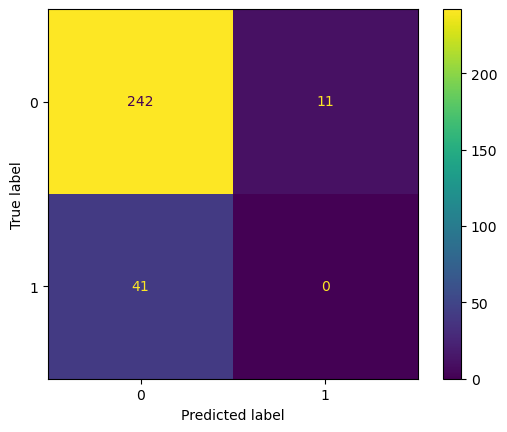

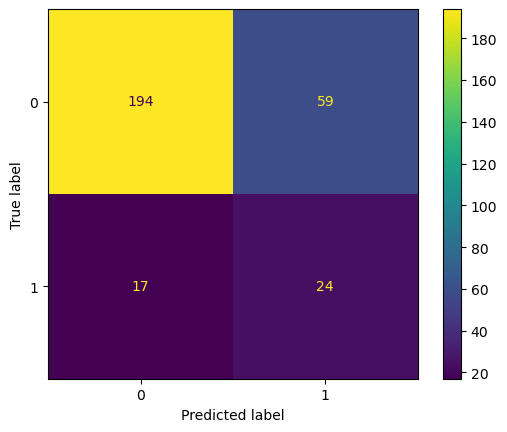

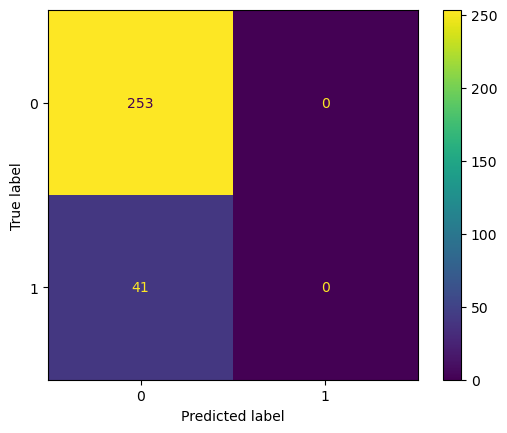

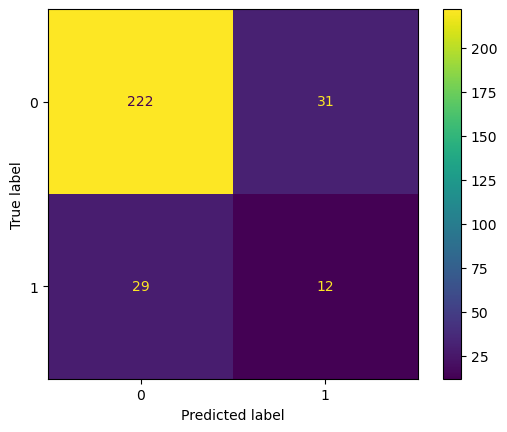

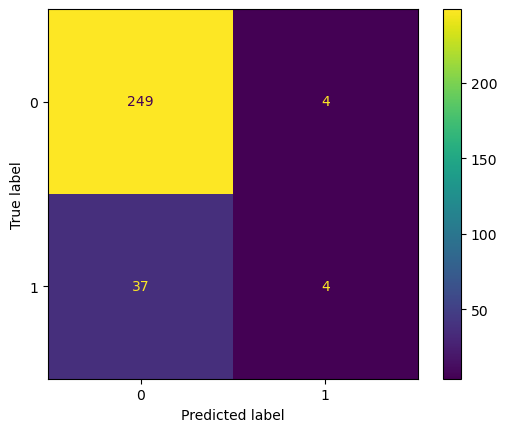

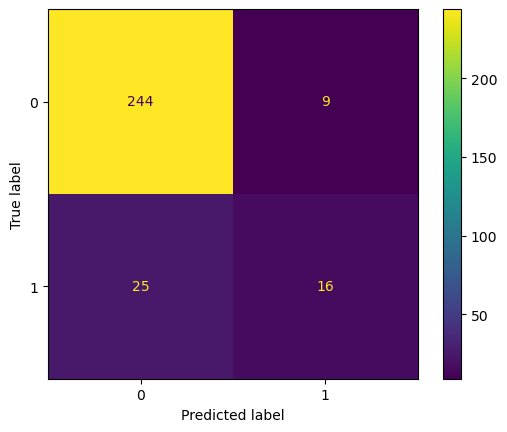

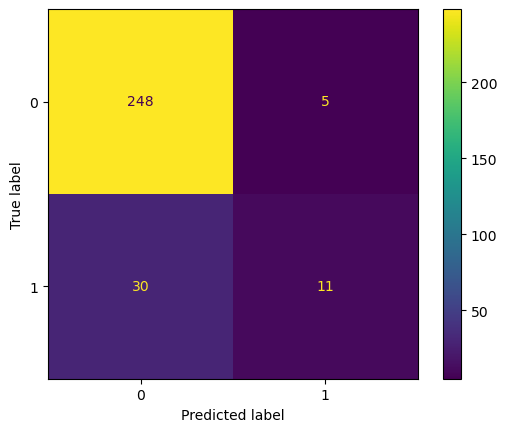

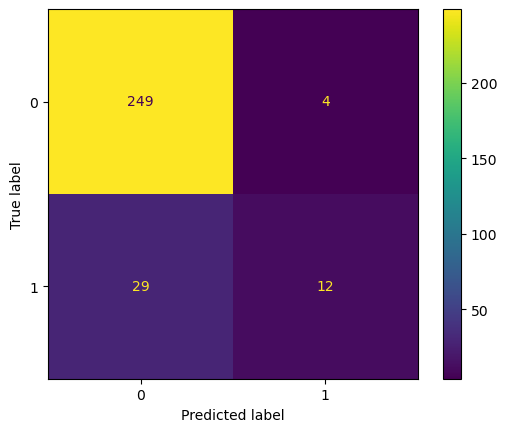

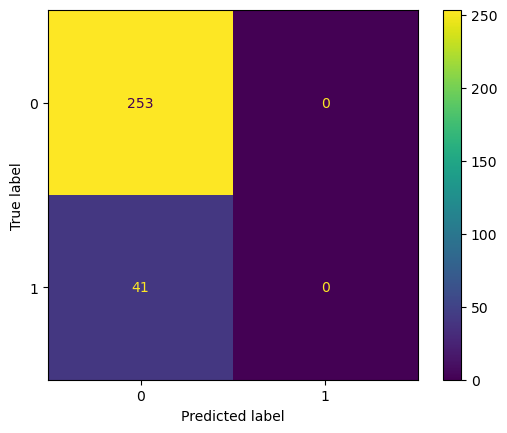

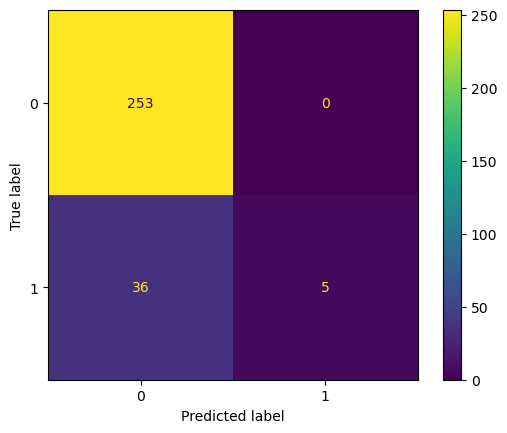

In [31]:
from pandas._libs.tslibs.offsets import MonthEnd
Knn=KNeighborsClassifier(n_neighbors=5)
nb=GaussianNB()
sv=SVC()
dt=DecisionTreeClassifier()
rs=RandomForestClassifier(n_estimators=50)
ad=AdaBoostClassifier()
gb=GradientBoostingClassifier()
xgb=XGBClassifier()
lg=LogisticRegression()
ETC = ExtraTreesClassifier()
models=[Knn,nb,sv,dt,rs,ad,gb,xgb,lg,ETC]

for model in models:
  print("*"*20,model,"*"*20)
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred,digits = 4))
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  print("_"*100)
    

------confusion Matrix---------


<AxesSubplot:>

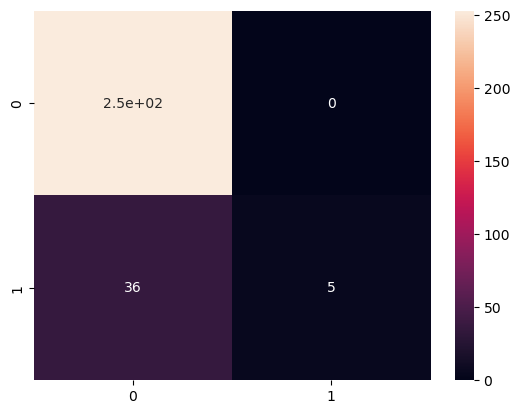

In [32]:
print('------confusion Matrix---------')
cr = confusion_matrix(y_test,y_pred)
sns.heatmap(cr,annot = True)

In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
CV_score_lr=cross_val_score(LogisticRegression(max_iter=1000),X,y,cv=5)

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\saiku\anaconda3\lib\site-packages

In [35]:
print(CV_score_lr)

[0.82993197 0.8537415  0.84353741 0.84353741 0.84693878]


In [36]:
mean_accuracy_lr=sum(CV_score_lr)/len(CV_score_lr)

In [37]:
mean_accuracy_lr=mean_accuracy_lr*100

In [38]:
mean_accuracy_lr=round(mean_accuracy_lr,2)


In [39]:
print(mean_accuracy_lr)

84.35


In [40]:
CV_score_knn=cross_val_score(KNeighborsClassifier(n_neighbors=5),X,y,cv=5)

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

C:

In [41]:
print(CV_score_knn)

[0.81632653 0.82312925 0.82653061 0.81632653 0.82312925]


In [42]:
mean_accuracy_knn=sum(CV_score_knn)/len(CV_score_knn)

In [43]:
mean_accuracy_knn=mean_accuracy_knn*100

In [44]:
mean_accuracy_knn=round(mean_accuracy_knn,2)

In [45]:
print(mean_accuracy_knn)

82.11


In [46]:
CV_score_nb=cross_val_score(GaussianNB(var_smoothing=1e-09),X,y,cv=5)

In [47]:
CV_score_nb

array([0.84013605, 0.78231293, 0.7585034 , 0.78231293, 0.82312925])

In [48]:
mean_accuracy_nb=sum(CV_score_nb)/len(CV_score_nb)

In [49]:
mean_accuracy_nb=mean_accuracy_nb*100

In [50]:
mean_accuracy_nb=round(mean_accuracy_nb,2)

In [51]:
print(mean_accuracy_nb)

79.73


In [52]:
CV_score_svc=cross_val_score(SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', ),X,y,cv=5)

In [53]:
CV_score_svc

array([0.83673469, 0.83673469, 0.84013605, 0.84013605, 0.84013605])

In [54]:
mean_accuracy_svc=sum(CV_score_svc)/len(CV_score_svc)

In [55]:
mean_accuracy_svc=mean_accuracy_svc*100

In [56]:
mean_accuracy_svc=round(mean_accuracy_svc,2)

In [57]:
print(mean_accuracy_svc)

83.88


In [58]:
CV_score_dtc=cross_val_score(DecisionTreeClassifier(criterion='gini', splitter='best' ),X,y,cv=5)

In [59]:
CV_score_dtc

array([0.76530612, 0.78231293, 0.79931973, 0.75510204, 0.75170068])

In [60]:
mean_accuracy_dtc=sum(CV_score_dtc)/len(CV_score_dtc)

In [61]:
mean_accuracy_dtc=mean_accuracy_dtc*100

In [62]:
mean_accuracy_dtc=round(mean_accuracy_dtc,2)

In [63]:
print(mean_accuracy_dtc)

77.07


In [64]:
CV_score_rfc=cross_val_score(RandomForestClassifier(n_estimators=100, criterion='gini' ),X,y,cv=5)

In [65]:
CV_score_rfc

array([0.85034014, 0.86394558, 0.86734694, 0.8537415 , 0.84693878])

In [66]:
mean_accuracy_rfc=sum(CV_score_rfc)/len(CV_score_rfc)

In [67]:
mean_accuracy_rfc=mean_accuracy_rfc*100

In [68]:
mean_accuracy_rfc=round(mean_accuracy_rfc,2)

In [69]:
print(mean_accuracy_rfc)

85.65


In [70]:
CV_score_abc=cross_val_score(AdaBoostClassifier(  learning_rate=1.0, algorithm='SAMME.R'),X,y,cv=5)

In [71]:
CV_score_abc

array([0.83673469, 0.86734694, 0.85714286, 0.88435374, 0.84013605])

In [72]:
mean_accuracy_abc=sum(CV_score_abc)/len(CV_score_abc)

In [73]:
mean_accuracy_abc=mean_accuracy_abc*100

In [74]:
mean_accuracy_abc=round(mean_accuracy_abc,2)

In [75]:
print(mean_accuracy_abc)

85.71


In [76]:
CV_score_gbc=cross_val_score(GradientBoostingClassifier(  loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0),X,y,cv=5)

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\saiku\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\saiku\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 525, in fit
    self._check_params()
  File "C:\Users\saiku\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss '

In [77]:
CV_score_gbc

array([nan, nan, nan, nan, nan])

In [78]:
CV_score_xgbc=cross_val_score(XGBClassifier( ),X,y,cv=5)

In [79]:
CV_score_xgbc

array([0.8537415 , 0.8707483 , 0.84693878, 0.8707483 , 0.86054422])

In [80]:
mean_accuracy_xgbc=sum(CV_score_xgbc)/len(CV_score_xgbc)

In [81]:
mean_accuracy_xgbc=mean_accuracy_xgbc*100

In [82]:
mean_accuracy_xgbc=round(mean_accuracy_xgbc,2)

In [83]:
print(mean_accuracy_xgbc)

86.05


In [84]:
from sklearn.ensemble import VotingClassifier
ensemble = VotingClassifier(estimators=[('XGB', xgb), ('ABC', ad)], voting='hard')

# fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

# make predictions on the test data
y_pred = ensemble.predict(X_test)

# evaluate the ensemble model
accuracy = ensemble.score(X_test, y_test)
print("Accuracy of the voting ensemble model: {:.2f}%".format(accuracy*100))

Accuracy of the voting ensemble model: 88.10%


In [85]:
from sklearn.ensemble import VotingClassifier
ensemble2 = VotingClassifier(estimators=[('XGB', xgb), ('ABC', ad),('GBC',gb)], voting='hard')

# fit the ensemble model on the training data
ensemble2.fit(X_train, y_train)

# make predictions on the test data
y_pred = ensemble2.predict(X_test)

# evaluate the ensemble model
accuracy = ensemble2.score(X_test, y_test)
print("Accuracy of the voting ensemble model: {:.2f}%".format(accuracy*100))

Accuracy of the voting ensemble model: 88.78%


In [86]:
from sklearn.ensemble import VotingClassifier
ensemble3 = VotingClassifier(estimators=[('XGB', xgb), ('ABC', ad),('GBC',gb),('ETC',ETC)], voting='hard')

# fit the ensemble model on the training data
ensemble3.fit(X_train, y_train)

# make predictions on the test data
y_pred = ensemble3.predict(X_test)

# evaluate the ensemble model
accuracy = ensemble3.score(X_test, y_test)
print("Accuracy of the voting ensemble model: {:.2f}%".format(accuracy*100))

Accuracy of the voting ensemble model: 87.07%


In [87]:
from sklearn.ensemble import VotingClassifier
ensemble4 = VotingClassifier(estimators=[('XGB', xgb), ('ABC', ad),('GBC',gb),('ETC',ETC),('RFC',rs)], voting='hard')

# fit the ensemble model on the training data
ensemble4.fit(X_train, y_train)

# make predictions on the test data
y_pred = ensemble4.predict(X_test)

# evaluate the ensemble model
accuracy = ensemble4.score(X_test, y_test)
print("Accuracy of the voting ensemble model: {:.2f}%".format(accuracy*100))

Accuracy of the voting ensemble model: 87.07%


In [88]:
# scikit-learn bootstrap
from sklearn.utils import resample

# prepare bootstrap sample
boot = resample(Data, replace=True, n_samples=4, random_state=1)
print('Bootstrap Sample: %s' % boot)
# out of bag observations
oob = [X for X in Data if X not in boot]
print('OOB Sample: %s' % oob)

Bootstrap Sample:       Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
1061   24          0               0        830           2                13   
235    43          0               2       1034           2                16   
1096   40          0               2        898           0                 6   
905    29          0               2        694           1                 1   

      Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
1061          2               1              1            1495  ...   
235           3               2              1             327  ...   
1096          2               3              1            1550  ...   
905           3               1              1            1264  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
1061                         3             80                 1   
235                          3             80                 1   
1096               

In [89]:
from sklearn.ensemble import BaggingClassifier

In [90]:
estimator_range = [2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32]

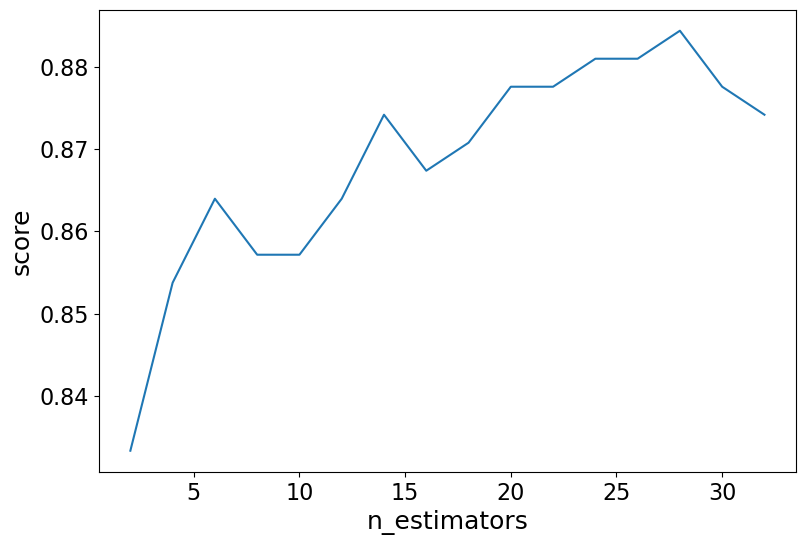

In [91]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 127)



models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()


In [100]:
clf_pred = clf.predict(X_test)

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

C:\Users\saiku\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClas

              precision    recall  f1-score   support

           0     0.8764    0.8972    0.8867       253
           1     0.2571    0.2195    0.2368        41

    accuracy                         0.8027       294
   macro avg     0.5668    0.5584    0.5618       294
weighted avg     0.7901    0.8027    0.7961       294

____________________________________________________________________________________________________


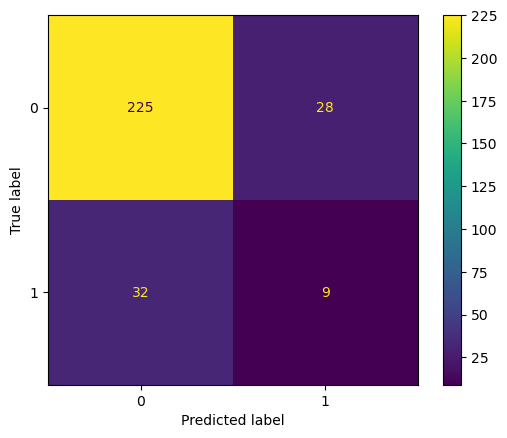

In [103]:
print(classification_report(y_test,clf_pred,digits=4))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print("_"*100)

In [96]:
from sklearn.metrics import roc_curve

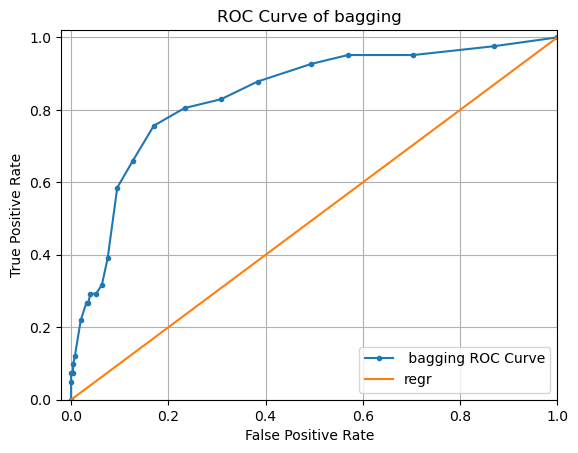

 ROC AUC Score of bagging: 84.1


In [97]:
#model = fitted_models['Bagging'].best_estimator_
bagging_y_pred_prob = clf.predict_proba(X_test)[:,1]
bagging_fpr, bagging_tpr, threshold = roc_curve(y_test, bagging_y_pred_prob)
# plot the ROC Curve
plt.plot(bagging_fpr, bagging_tpr, marker='.', label=' bagging ROC Curve')
plt.plot([0, 1], [0, 1],label='regr')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of bagging')
plt.legend(loc="lower right")
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.grid()
plt.show()

from sklearn.metrics import roc_auc_score
bagging_auc = round(roc_auc_score(y_test, bagging_y_pred_prob)*100,2)
print(' ROC AUC Score of bagging:',bagging_auc)